In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - наличие диабета у субъекта, выражена 0 (здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

В загруженных данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [3]:
pG = len(data[data['Glucose'].isnull()])
pB = len(data[data['BloodPressure'].isnull()])
pS = len(data[data['SkinThickness'].isnull()])
pI = len(data[data['Insulin'].isnull()])
pBMI = len(data[data['BMI'].isnull()])
print(f'"В переменной Glucose {pG} пропущенных значений"')
print(f'"В переменной BloodPressure {pB} пропущенных значений"')
print(f'"В переменной SkinThickness {pS} пропущенных значений"')
print(f'"В переменной Insulin {pI} пропущенных значений"')
print(f'"В переменной BMI {pBMI} пропущенных значений"')

"В переменной Glucose 5 пропущенных значений"
"В переменной BloodPressure 35 пропущенных значений"
"В переменной SkinThickness 227 пропущенных значений"
"В переменной Insulin 374 пропущенных значений"
"В переменной BMI 11 пропущенных значений"


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
data['Glucose_Median'] = data['Glucose'].fillna(data['Glucose'].median())
data['BloodPressure_Median'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['SkinThickness_Median'] = data['SkinThickness']. fillna(data['SkinThickness'].median())
data['Insulin_Median'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI_Mean'] = data['BMI'].fillna(data['BMI'].mean()) 


__Задание 3.__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Mean
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,121.656250,72.386719,29.108073,140.671875,32.457464
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,30.438286,12.096642,8.791221,86.383060,6.875151
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,99.750000,64.000000,25.000000,121.500000,27.500000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000,72.000000,29.000000,125.000000,32.400000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
class1 = len(data[data.Age > 50][data.Class == 1])
print(f'Диабет обнаржуен у {class1} женищин старше 50 лет.')

Диабет обнаржуен у 38 женищин старше 50 лет.


/var/folders/3h/y_h_gk8j16xdnzw4h9_54dvh0000gn/T/ipykernel_35998/2958080405.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class1 = len(data[data.Age > 50][data.Class == 1])


__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [7]:
data.sort_values(by=['Pregnancies'], ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Mean
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1,163.0,72.0,41.0,114.0,40.9
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1,136.0,70.0,32.0,110.0,37.1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1,100.0,78.0,25.0,184.0,36.6


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [8]:
data[(data.Age < 30) & (data.Pregnancies >= 3)].shape
#117 женщин

(117, 14)

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
data[(data.BloodPressure < 89) & (data.BloodPressure > 80)].shape[0]/ data.shape[0] * 100

13.671875

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
data[(data.BloodPressure < 89) & (data.BloodPressure > 80) & (data.BMI >= 30)].shape
#у 83 человек

(83, 14)

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [11]:
data.groupby('Class')['Glucose'].mean()

Class
0    110.643863
1    142.319549
Name: Glucose, dtype: float64

In [12]:
data.groupby('Class')['BloodPressure'].mean()

Class
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64

In [13]:
data.groupby('Class')['Insulin'].mean()

Class
0    130.287879
1    206.846154
Name: Insulin, dtype: float64

__Задание 10.__

Постройте круговую диаграмму для признака __Class__.

<Axes: >

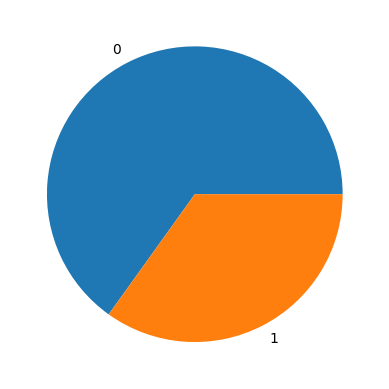

In [ ]:
data.groupby('Class').size().plot(kind='pie')
#size считает кол-во элементов по парметру Class. Если убрать size, питон выдаст ошибку
#диаграмма состоит из двух частей, потому что параметр Class имеет два значения 

__Задание 11.__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

Постройте нормальное распределение поверх графика.

<Axes: >

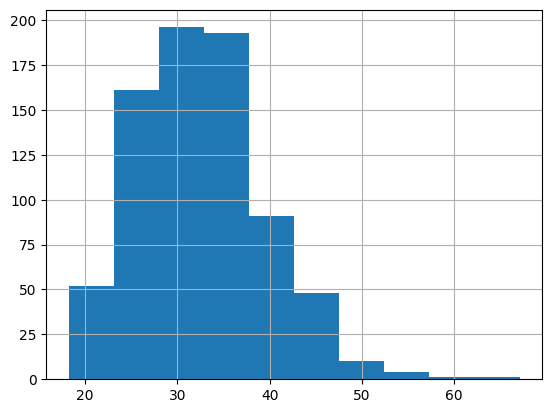

In [123]:
data.BMI.hist()

График показывает, что самое часто встречающееся значение BMI -- 30


/var/folders/3h/y_h_gk8j16xdnzw4h9_54dvh0000gn/T/ipykernel_61687/3007038217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BMI.dropna())


<Axes: xlabel='BMI', ylabel='Density'>

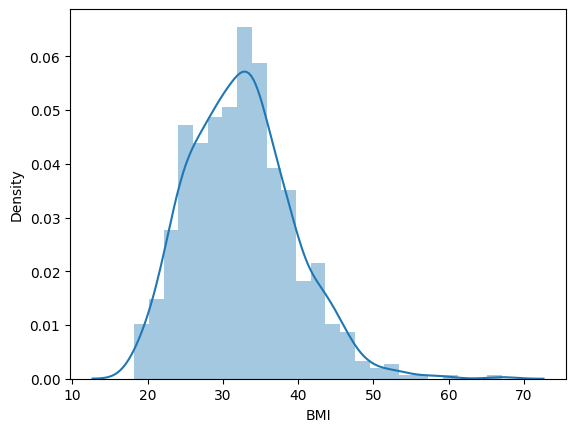

In [124]:
sns.distplot(data.BMI.dropna())

Мы можем сделать вывод, что данные распределены нормально.

__Задание 12.__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

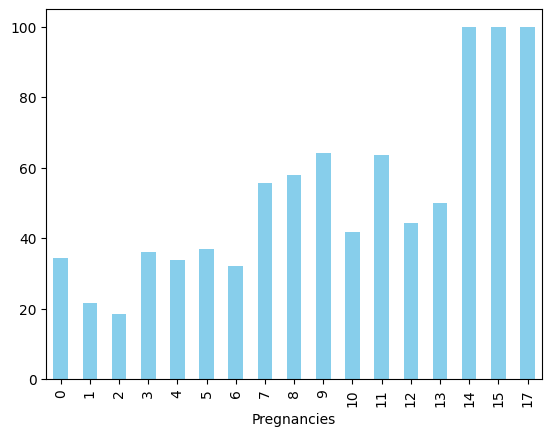

In [125]:
import matplotlib.pyplot as plt
pregnancy_diabetes = data.groupby('Pregnancies')['Class'].mean() * 100
pregnancy_diabetes.plot(kind='bar', color='skyblue')
plt.show()


__Задание 13.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [126]:
data['WasPregnant'] = data['Pregnancies'].apply(lambda x: 0 if x == 0 else 1)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Mean,WasPregnant
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,125.0,33.6,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,125.0,26.6,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.0,125.0,23.3,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1,0


__Задание 14.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [140]:
data[(data.WasPregnant == 1) & (data.Class == 1)].shape[0]/ data.shape[0] * 100

29.947916666666668

In [141]:
data[(data.WasPregnant == 0) & (data.Class == 1)].shape[0]/ data.shape[0] * 100

4.947916666666666

In [142]:
(data[(data.WasPregnant == 1) & (data.Class == 1)].shape[0]/ data.shape[0] * 100) / (data[(data.WasPregnant == 0) & (data.Class == 1)].shape[0]/ data.shape[0] * 100)


6.052631578947369

__Задание 15.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [128]:
def get_body_type(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal Weight'
    elif 25 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
    
data['BodyType'] = data['BMI'].apply(get_body_type)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Mean,WasPregnant,BodyType
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,125.0,33.6,1,Obesity
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,125.0,26.6,1,Overweight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.0,125.0,23.3,1,Normal Weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1,0,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,101.0,76.0,48.0,180.0,32.9,1,Obesity
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,122.0,70.0,27.0,125.0,36.8,1,Obesity
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,121.0,72.0,23.0,112.0,26.2,1,Overweight
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,126.0,60.0,29.0,125.0,30.1,1,Obesity


__Задание 16.__

Какой процент женщин с нормальными показателями веса и давления больны диабетом?

In [129]:
def get_blood_pressure(BloodPressure):
    if 80 > BloodPressure < 89:
        return 'Normal Blood Pressure'
    else:
        return 'High of Low Pressure'
    
data['NormalBloodPressure'] = data['BloodPressure'].apply(get_blood_pressure)
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Mean,WasPregnant,BodyType,NormalBloodPressure
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,125.0,33.600000,1,Obesity,Normal Blood Pressure
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,125.0,26.600000,1,Overweight,Normal Blood Pressure
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.0,125.0,23.300000,1,Normal Weight,Normal Blood Pressure
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.100000,1,Overweight,Normal Blood Pressure
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.100000,0,Obesity,Normal Blood Pressure
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,116.0,74.0,29.0,125.0,25.600000,1,Overweight,Normal Blood Pressure
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,78.0,50.0,32.0,88.0,31.000000,1,Obesity,Normal Blood Pressure
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,115.0,72.0,29.0,125.0,35.300000,1,Obesity,High of Low Pressure
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,197.0,70.0,45.0,543.0,30.500000,1,Obesity,Normal Blood Pressure
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,125.0,96.0,29.0,125.0,32.457464,1,Obesity,High of Low Pressure


In [134]:
data[(data.BodyType == 'Normal Weight') & (data.NormalBloodPressure == 'Normal Blood Pressure')].shape[0]/ data.shape[0] * 100



10.286458333333332